## Import

In [1]:
import pandas as pd
from utils import import_df
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
from utils import export_df

df = import_df("1-data-cleaning-output.json")
df.head()

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_f3,vib_y_kurt,vib_y_peak,vib_y_vel,vib_z_acc,vib_z_kurt,vib_z_peak,vib_z_vel,current,label
3050,-0.068780,-4.477798,-6.905241,-4.547951,-2.283589,-0.124857,-1.274090,-0.499428,-1.128634,-0.117876,...,1.760176,0.521458,0.685517,2.844896,1.684042,0.362336,0.576215,2.100146,3.967956,working-engine-1
3051,0.368391,-5.471160,-5.840925,-3.531701,-1.571756,-1.326505,-1.415999,0.166629,-0.261158,-0.461204,...,0.506051,0.530757,0.740439,2.838546,1.700080,0.352717,0.611753,2.122022,3.950103,working-engine-1
3052,0.063973,-5.670291,-6.273518,-3.701076,-2.121080,-0.683337,-1.354200,-0.224765,-0.041428,-0.458915,...,1.760176,0.520424,0.724166,2.835371,1.668003,0.353037,0.573677,2.068546,3.950103,working-engine-1
3053,-0.116846,-5.862554,-6.252918,-3.568322,-2.457542,-0.948844,-0.878119,-0.618448,0.189746,0.184253,...,0.242024,0.523180,0.756713,2.863947,1.684042,0.358809,0.581292,2.100146,3.960632,working-engine-1
3056,-0.380064,-5.342985,-6.486381,-3.854429,-2.130236,-1.038109,-0.688144,0.228428,-0.586175,-0.323873,...,1.683168,0.518702,0.752644,2.848071,1.684042,0.353679,0.596522,2.102577,3.961089,working-engine-1


## Data genaration

In [2]:
for label in df.label.unique():
    print(len(df[df.label == label]))
df_base = df.copy()

782
321
1220
287
3821
3975
1146
1147


In [3]:
X = df.drop(["label"], axis=1)
y = df.label
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
X_resampled

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_f2,vib_y_f3,vib_y_kurt,vib_y_peak,vib_y_vel,vib_z_acc,vib_z_kurt,vib_z_peak,vib_z_vel,current
0,-0.068780,-4.477798,-6.905241,-4.547951,-2.283589,-0.124857,-1.274090,-0.499428,-1.128634,-0.117876,...,2.766388,1.760176,0.521458,0.685517,2.844896,1.684042,0.362336,0.576215,2.100146,3.967956
1,0.368391,-5.471160,-5.840925,-3.531701,-1.571756,-1.326505,-1.415999,0.166629,-0.261158,-0.461204,...,0.404274,0.506051,0.530757,0.740439,2.838546,1.700080,0.352717,0.611753,2.122022,3.950103
2,0.063973,-5.670291,-6.273518,-3.701076,-2.121080,-0.683337,-1.354200,-0.224765,-0.041428,-0.458915,...,1.334103,1.760176,0.520424,0.724166,2.835371,1.668003,0.353037,0.573677,2.068546,3.950103
3,-0.116846,-5.862554,-6.252918,-3.568322,-2.457542,-0.948844,-0.878119,-0.618448,0.189746,0.184253,...,0.415824,0.242024,0.523180,0.756713,2.863947,1.684042,0.358809,0.581292,2.100146,3.960632
4,-0.380064,-5.342985,-6.486381,-3.854429,-2.130236,-1.038109,-0.688144,0.228428,-0.586175,-0.323873,...,1.749928,1.683168,0.518702,0.752644,2.848071,1.684042,0.353679,0.596522,2.102577,3.961089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,0.081110,3.116976,1.714365,-0.406034,-0.317465,-0.032827,0.508191,-0.189099,-0.011805,-0.138399,...,0.269936,0.357201,0.999746,0.975390,0.977390,1.017857,0.984519,1.037138,1.102855,3.946386
31796,0.035168,1.734461,0.217328,-0.205321,-0.418382,0.280340,0.617862,0.149218,-0.362921,0.024198,...,2.694416,1.888218,1.005780,1.043067,1.024175,1.017857,0.978909,1.012757,1.053478,3.943798
31797,-0.650548,1.857576,-0.239442,-0.318381,0.369284,0.344283,1.084616,0.127896,0.287569,-0.826522,...,0.352399,0.451399,1.036118,1.042016,0.999911,1.017857,1.016332,1.032959,1.235932,3.940781
31798,-0.771163,2.131854,0.602314,0.521694,0.362392,0.056316,-0.161655,-0.442953,0.429747,0.143336,...,0.549176,0.657730,1.004513,1.026821,1.000679,0.984485,0.964709,0.897800,1.123313,3.940647


In [4]:
df = X_resampled
df["label"] = y_resampled

In [5]:
for label in X_resampled.label.unique():
    print(len(df[df.label == label]))

3975
3975
3975
3975
3975
3975
3975
3975


## Export

In [6]:
export_df(df, "2-data-generation-output.json")

## Visualize

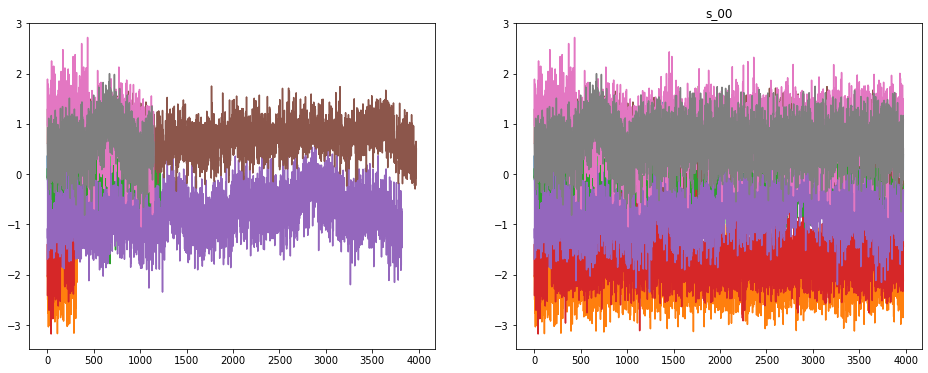

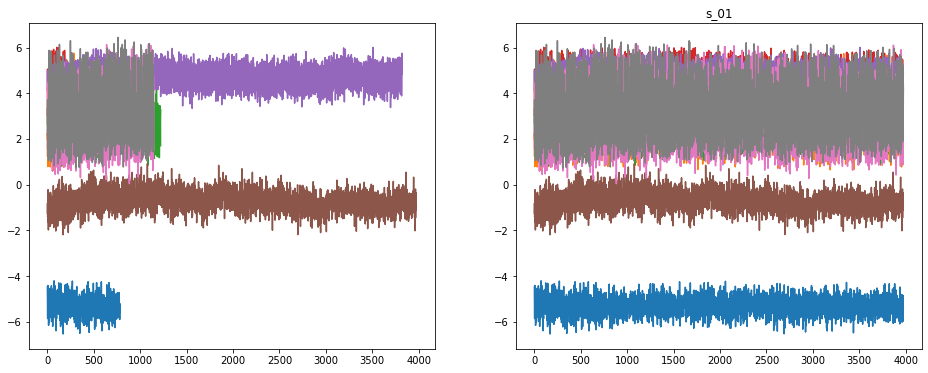

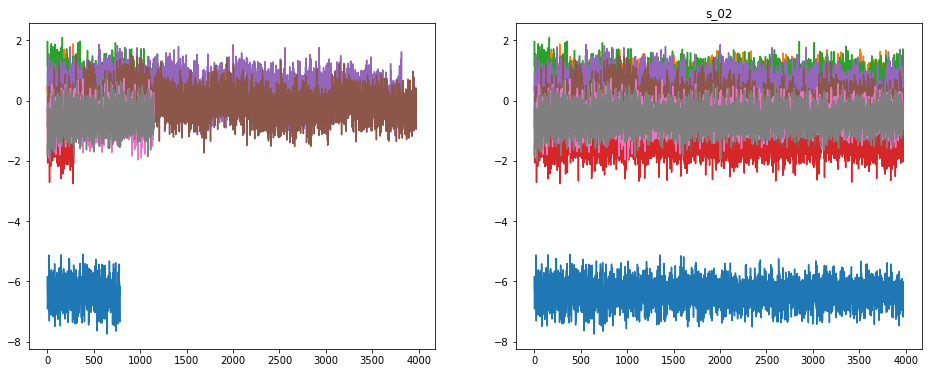

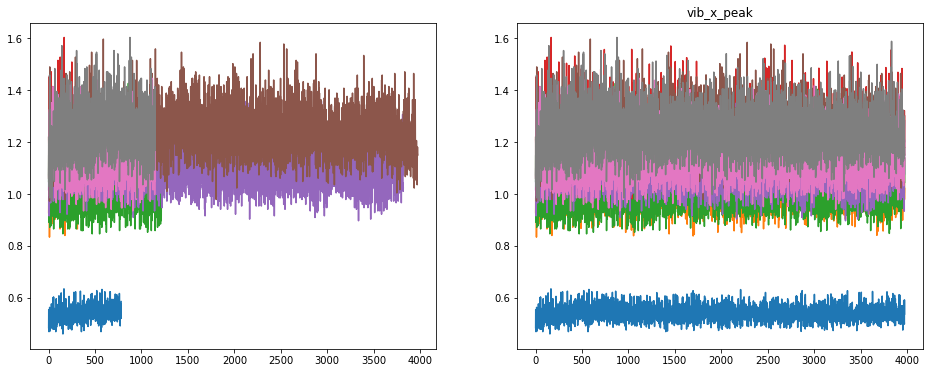

In [7]:
for col in ['s_00', 's_01', 's_02', 'vib_x_peak']:
    fig, (ax1, ax2) = plt.subplots(1,2)
    for label in df.label.unique():
        dff = df[df.label == label][col].reset_index()
        ax2.plot(dff[col], label=label)
        dff = df_base[df_base.label == label][col].reset_index()
        ax1.plot(dff[col], label=label)
    fig.set_size_inches(16, 6)
    plt.title(col)
    plt.show()

## Data visulization using dimensionality reduction

In [8]:
import umap
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

df_dr = df.drop(["label"], axis=1)
reducer = PCA()
embedding= reducer.fit_transform(df_dr)
c=[sns.color_palette()[x] for x in pd.factorize(df.label)[0]]

In [9]:
df_dr = df_base.drop(["label"], axis=1)
reducer = PCA()
embedding_base= reducer.fit_transform(df_dr)
c_base=[sns.color_palette()[x] for x in pd.factorize(df_base.label)[0]]

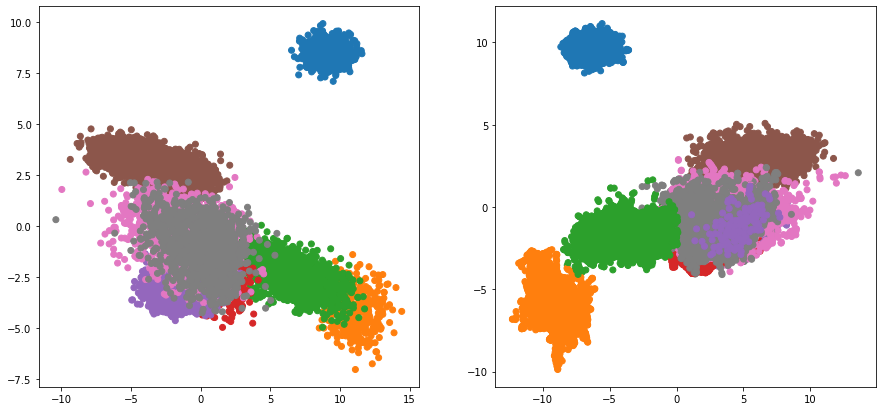

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
ax1.scatter(embedding_base[:, 0], embedding_base[:, 1], c=c_base)
ax2.scatter(embedding[:, 0], embedding[:, 1], c=c)
plt.show()